# Background detection, and image segimentaion

In [1]:
# organize imports
import cv2
import imutils
from matplotlib import pyplot as plt
import os

In [2]:
# global variables
bg = None

In [30]:
# initialize weight for running average
aWeight = 0.5

# get the reference to the webcam
camera = cv2.VideoCapture(0)

# region of interest (ROI) coordinates
top, right, bottom, left = 10, 350, 225, 590

# initialize num of frames
num_frames = 0

(DEBUG): Check if camera works.

In [4]:
 # keep looping, until interrupted
while(True):
    # get the current frame
    (grabbed, frame) = camera.read()
    
    if grabbed:
        # resize the frame
        frame = imutils.resize(frame, width=700)

        # display the frame with segmented hand
        cv2.imshow("Video Feed", frame)

        # observe the keypress by the user
        keypress = cv2.waitKey(1) & 0xFF

        # if the user pressed "q", then stop looping
        if keypress == ord("q"):
            break
    else:
        print("[WARNING] Unable to open camera.")
        break

# free up memory
camera.release()
cv2.destroyAllWindows()

### Genearate some images

In [5]:
if not os.path.isdir('sample_images'):
    os.mkdir('sample_images')

Press `c` to capture images

In [31]:
counter = 0
# region of interest (ROI) coordinates
top, right, bottom, left = 10, 350, 225, 590
# keep looping, until interrupted
while(True):
    # get the current frame
    (grabbed, frame) = camera.read()
    
    if grabbed:
        # resize the frame
        frame = imutils.resize(frame, width=700)
        
        # flip the frame so that it is not the mirror view
        frame = cv2.flip(frame, 1)
        
        # observe the keypress by the user
        keypress = cv2.waitKey(1) & 0xFF

        # if the user pressed "q", then stop looping
        if keypress == ord("q"):
            break
        if keypress == ord("c"):
            # cv2.imwrite( 'sample_images/' + str(counter) + '.png', frame[top:bottom, right:left])
            cv2.imwrite( 'sample_images/' + 'bg.png', frame[top:bottom, right:left])
            counter += 1
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
        
        # display the frame with segmented hand
        cv2.imshow("Video Feed", frame)
            
    else:
        print("[WARNING] Unable to open camera.")
        break

# free up memory
camera.release()
cv2.destroyAllWindows()

## Displaying Image

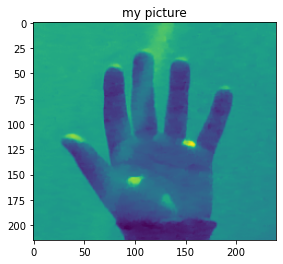

In [29]:
img = cv2.imread('sample_images/hand.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)
plt.title('my picture')
plt.show()

### Running Average

In [20]:
def run_avg(image, aWeight):
    global bg
    # initialize the background
    if bg is None:
        bg = image.copy().astype("float")
        return
    cv2.accumulateWeighted(image, bg, aWeight)

In [23]:
# region of interest (ROI) coordinates
top, right, bottom, left = 10, 350, 225, 590
while(True):
    # get the current frame
    (grabbed, frame) = camera.read()
    
    if grabbed:
         # resize the frame
        frame = imutils.resize(frame, width=700)

        # flip the frame so that it is not the mirror view
        frame = cv2.flip(frame, 1)

        # clone the frame
        clone = frame.copy()

        # get the ROI
        roi = frame[top:bottom, right:left]

        # convert the roi to grayscale and blur it
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (7, 7), 0)
        
        # calculate running average
        run_avg(gray, aWeight)
        
        # show running average
        cv2.imshow("Running Average", gray)
        
        # draw rectange outside ROI
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 255, 0), 2)
        
        # display the frame with segmented hand
        cv2.imshow("Video Feed", frame)

        # observe the keypress by the user
        keypress = cv2.waitKey(1) & 0xFF

        # if the user pressed "q", then stop looping
        if keypress == ord("q"):
            break
        
            
    else:
        print("[WARNING] Unable to open camera.")
        break

# free up memory
camera.release()
cv2.destroyAllWindows()

### Segimentation

In [40]:
def segment(bg, image, threshold=25):
    # find the absolute difference between background and current frame
    diff = cv2.absdiff(bg.astype("uint8"), image)

    # threshold the diff image so that we get the foreground
    thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)[1]

    # get the contours in the thresholded image
    (cnts, _) = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # return None, if no contours detected
    if len(cnts) == 0:
        return
    else:
        # based on contour area, get the maximum contour which is the hand
        segmented = max(cnts, key=cv2.contourArea)
        return (thresholded, segmented)

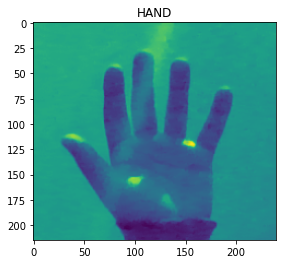

In [37]:
hand = cv2.imread('sample_images/hand.png')
hand = cv2.cvtColor(hand, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(hand, (7, 7), 0)

plt.imshow(hand)
plt.title('HAND')
plt.show()

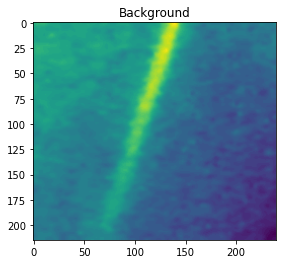

In [38]:
bg = cv2.imread('sample_images/bg.png')
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2GRAY)
bg = cv2.GaussianBlur(bg, (7, 7), 0)

plt.imshow(bg)
plt.title('Background')
plt.show()

In [43]:
thres, segm = segment(bg, hand)

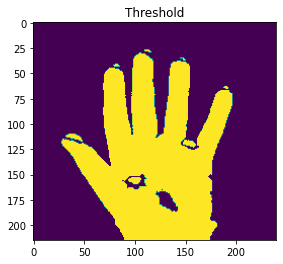

In [46]:
plt.imshow(thres)
plt.title('Threshold')
plt.show()

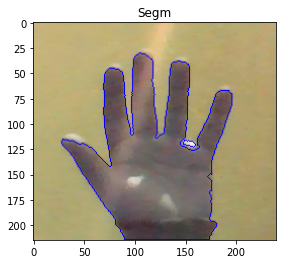

In [54]:
hand_orig = cv2.imread('sample_images/hand.png')
cv2.drawContours(hand_orig, [segm], -1, (0, 0, 255))
plt.imshow(hand_orig)
plt.title('Segm')
plt.show()